# Introduction

Data cleaning is an essential process in any data science project as it helps to ensure that the data is accurate, consistent, and complete. In this blog, we will discuss various techniques and methods for cleaning data using Python. We will be using a dataset from Kaggle on [Heart Disease UCI](https://medium.com/r/?url=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fcherngs%2Fheart-disease-cleveland-uci) to illustrate these techniques.

## 1. Dealing with Missing Data: 
Missing data is a common problem in datasets, and it can lead to biased or incorrect results if not handled properly. In Python, we can use the Pandas library to handle missing data. We can use the isnull() function to check for missing values in the dataset, and the fillna() function to fill in the missing values with a suitable value.

**[READ MORE](https://medium.com/@yennhi95zz/a-comprehensive-guide-to-data-cleaning-with-python-104906fc1263)**

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv("/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
# Check for missing data
print(data.isnull().sum())

# Fill in missing values with the mean
data = data.fillna(data.mean())
data.head()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
# Remove duplicate rows
data = data.drop_duplicates()

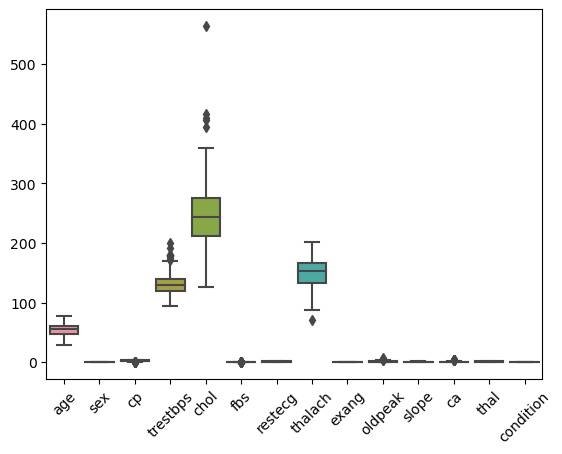

In [5]:
# Create a boxplot to identify outliers
ax = sns.boxplot(data=data)
ax.set_xticklabels(labels=data.columns, rotation = 45)

# Calculate the Z-score for each value
z_scores = (data - data.mean()) / data.std()

# Identify and remove outliers
data = data[(z_scores < 3).all(axis=1)]


In [6]:
# Encode categorical features
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [7]:
# Split the dataset into training and testing sets
X = data.drop('condition', axis=1)
y = data['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.8275862068965517


In [8]:
# Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.79      0.90      0.84        30

    accuracy                           0.83        58
   macro avg       0.83      0.82      0.83        58
weighted avg       0.83      0.83      0.83        58

Confusion Matrix:
 [[21  7]
 [ 3 27]]


# References
- Original Data Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease
- Detail Explanation about the code on [MEDIUM](https://medium.com/@yennhi95zz/a-comprehensive-guide-to-data-cleaning-with-python-104906fc1263)

*Stay connected on [LinkedIn](https://www.linkedin.com/in/nhi-yen/), [Medium](https://medium.com/@yennhi95zz), [Kaggle](https://www.kaggle.com/nhiyen) and [Github](https://github.com/yennhi95zz) for valuable insights on Data Analysis and Science.*